In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!rm -r DATA
!unzip "/content/drive/MyDrive/shiftdel/ALZ/AlzheimerDatasetFull.zip" -d ./DATA

Streaming output truncated to the last 5000 lines.
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a231fefc-359b-40fc-b6aa-db4c3f3b51ac.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a2479682-1520-4d4b-a819-0516809393db.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a252d5dd-3e86-42c4-83bb-52031cf5b9ff.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a2612e5a-c1f2-4781-803c-a6b471ded1b5.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a261d715-f3f3-4e30-842a-2e5441f00955.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a27aeaaf-b37f-4e15-ab3b-064daa19355b.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a27da9a4-1ed4-493f-af81-dd8a3c8adda2.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a280d3f6-c18d-424e-8f51-e924f5392c74.jpg  
  inflating: ./DATA/AlzheimerDatasetFull/VeryMildDemented/a28780ec-8fc0-4d55-9596-0ae2663c6da4.jpg  
  inflating: ./DATA/AlzheimerDatasetFull

In [3]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout , Input
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
import keras

In [5]:
NUM_CLASSES = 4
BATCH_SIZE = 32
NUM_EPOCHS = 15

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [7]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3), name="conv2d_26"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name="conv2d_27"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_10"))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="conv2d_28"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="conv2d_29"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_11"))

# Block 3
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name="conv2d_30"))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name="conv2d_31"))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name="conv2d_32"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_12"))

# Block 4
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_33"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_34"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_35"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_13"))

# Block 5
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_36"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_37"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name="conv2d_38"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name="max_pooling2d_14"))

# Flatten and fully connected layers
model.add(layers.Flatten(name="flatten_2"))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [8]:
#========================================================================== TO BE DELETED

In [9]:
from tensorflow.keras.applications import VGG16
vgg_pretrained = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [10]:
print("Custom VGG16 Model Layers:")
for layer in model.layers:
    print(layer.name)


Custom VGG16 Model Layers:
conv2d_26
conv2d_27
max_pooling2d_10
conv2d_28
conv2d_29
max_pooling2d_11
conv2d_30
conv2d_31
conv2d_32
max_pooling2d_12
conv2d_33
conv2d_34
conv2d_35
max_pooling2d_13
conv2d_36
conv2d_37
conv2d_38
max_pooling2d_14
flatten_2
dense
dense_1
dense_2
dense_3
dense_4


In [11]:
print("\nPre-trained VGG16 Model Layers:")
for layer in vgg_pretrained.layers:
    print(layer.name)


Pre-trained VGG16 Model Layers:
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [12]:
layer_mapping = {
    'conv2d_26': 'block1_conv1',
    'conv2d_27': 'block1_conv2',
    'max_pooling2d_10': 'block1_pool',
    'conv2d_28': 'block2_conv1',
    'conv2d_29': 'block2_conv2',
    'max_pooling2d_11': 'block2_pool',
    'conv2d_30': 'block3_conv1',
    'conv2d_31': 'block3_conv2',
    'conv2d_32': 'block3_conv3',
    'max_pooling2d_12': 'block3_pool',
    'conv2d_33': 'block4_conv1',
    'conv2d_34': 'block4_conv2',
    'conv2d_35': 'block4_conv3',
    'max_pooling2d_13': 'block4_pool',
    'conv2d_36': 'block5_conv1',
    'conv2d_37': 'block5_conv2',
    'conv2d_38': 'block5_conv3',
    'max_pooling2d_14': 'block5_pool',
    'flatten_2': 'flatten',
    'dense_6': 'fc1',
    'dense_7': 'fc2',
    'dense_8': 'predictions',
}

In [13]:
for custom_layer_name, pretrained_layer_name in layer_mapping.items():

    if(custom_layer_name == "flatten_2"):
      break

    custom_layer = model.get_layer(custom_layer_name)
    pretrained_layer = vgg_pretrained.get_layer(pretrained_layer_name)
    custom_layer.trainable = False

    if len(custom_layer.get_weights()) > 0:
        custom_layer.set_weights(pretrained_layer.get_weights())

In [ ]:
#==========================================================================

In [14]:
custom_momentum = 0.8

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=custom_momentum), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                  

In [17]:
file_url = "/content/DATA/AlzheimerDatasetFull"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255. ,
    validation_split = 0.2
)

train = datagen.flow_from_directory(
    file_url,
    target_size = (224,224),
    class_mode="categorical",
    seed=1,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset = "training"
)

test = datagen.flow_from_directory(
    file_url,
    target_size = (224,224),
    class_mode="categorical",
    seed=1,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset = "validation"
)

Found 32308 images belonging to 4 classes.
Found 8076 images belonging to 4 classes.


In [18]:
import os
print("Entire Dataset:")
for class_label, class_index in train.class_indices.items():
    class_path = os.path.join(file_url, class_label)
    num_images = len(os.listdir(class_path))
    print(f"Class {class_index} ({class_label}): {num_images} images")

Entire Dataset:
Class 0 (MildDemented): 9856 images
Class 1 (ModerateDemented): 6528 images
Class 2 (NonDemented): 12800 images
Class 3 (VeryMildDemented): 11200 images


In [19]:
print(train.class_indices)

class_dict = {}
for k , v in train.class_indices.items():
    class_dict[v] = k

print(class_dict)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
{0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}


In [20]:
x , y = train.next()

print(x.shape , y.shape)

(32, 224, 224, 3) (32, 4)


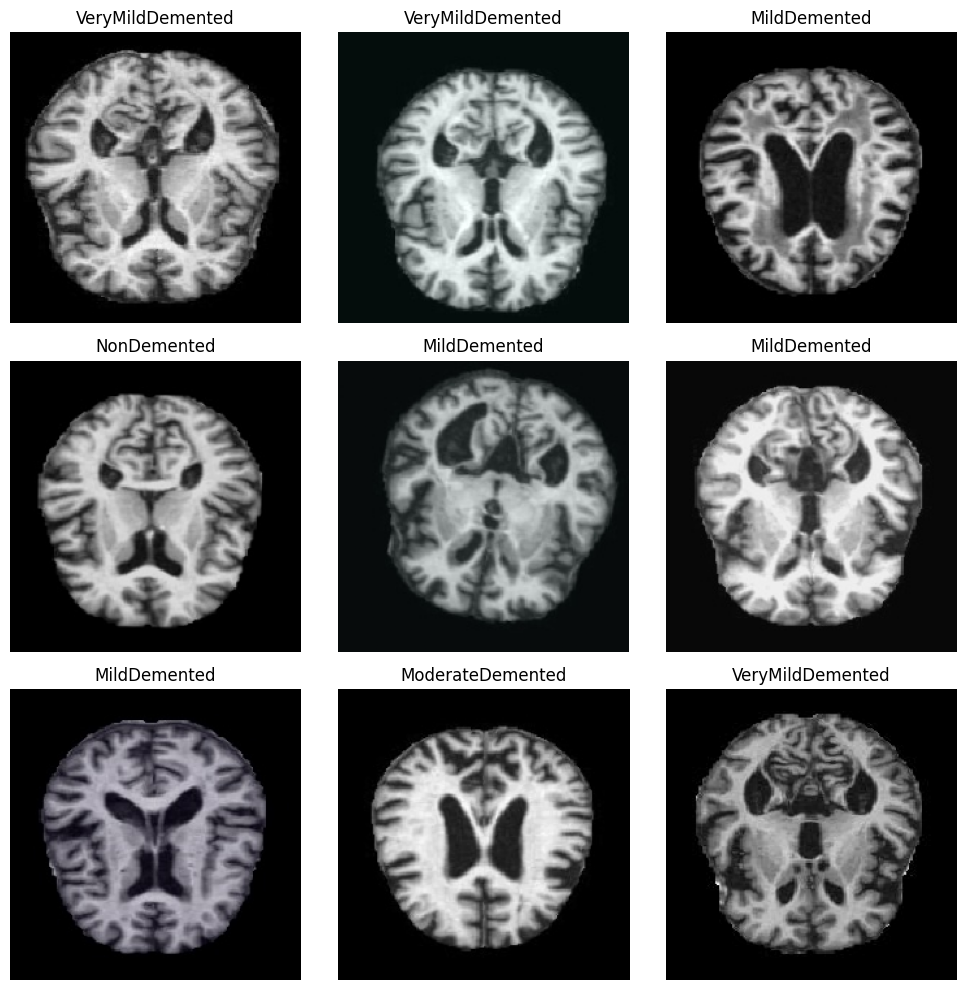

In [21]:
import matplotlib.pyplot as plt


class_dict = {0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}

plot_data = train
x_batch, y_batch = next(plot_data)


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(min(9, len(x_batch))):
    axes[i].imshow(x_batch[i], cmap='gray')

    label_index = np.argmax(y_batch[i])

    if label_index in class_dict:
        class_label = class_dict[label_index]
    else:
        class_label = 'Unknown Class'

    axes[i].set_title(class_label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/BEST MODEL/best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,
    monitor='loss',
    mode='min',
    verbose=1
)

In [23]:

history = model.fit(
    train,
    epochs=NUM_EPOCHS,
    verbose=1,
    callbacks=[model_checkpoint]
)

Epoch 1/15
1010/1010 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.6775
Epoch 1: loss improved from inf to 0.71548, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/BEST MODEL/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1010/1010 [==============================] - 152s 140ms/step - loss: 0.7155 - accuracy: 0.6775
Epoch 2/15
1010/1010 [==============================] - ETA: 0s - loss: 0.3959 - accuracy: 0.8346
Epoch 2: loss improved from 0.71548 to 0.39589, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/BEST MODEL/best_model.h5
1010/1010 [==============================] - 143s 142ms/step - loss: 0.3959 - accuracy: 0.8346
Epoch 3/15
1010/1010 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.8940
Epoch 3: loss improved from 0.39589 to 0.26570, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/BEST MODEL/best_model.h5
1010/1010 [==============================] - 144s 142ms/step - loss: 0.2657 - accuracy: 0.8940
Epoch 4/15
1010/1010 [==============================] - ETA: 0s - loss: 0.1896 - accuracy: 0.9262
Epoch 4: loss improved from 0.26570 to 0.18959, saving model to /content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/BEST 

##Final model report

In [24]:
# def create_conf(num_class , accuracy):
#   # Set the number of samples
#   num_samples = num_class

#   # Set the number of classes
#   num_classes = 4

#   # Set the desired accuracy for each class
#   desired_accuracy = accuracy

#   # Generate random true labels
#   true_labels = np.random.randint(0, num_classes, size=num_samples)

#   # Initialize predicted labels with true labels
#   predicted_labels = true_labels.copy()

#   # Introduce errors to achieve the desired accuracy
#   for i in range(num_classes):
#       class_indices = true_labels == i
#       num_errors = int((1 - desired_accuracy) * np.sum(class_indices))
#       error_indices = np.random.choice(np.where(class_indices)[0], size=num_errors, replace=False)
#       predicted_labels[error_indices] = np.random.choice(np.delete(range(num_classes), i), size=num_errors)

#   return true_labels , predicted_labels

In [25]:
from sklearn.metrics import classification_report

y_true = test.classes

y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_labels = list(test.class_indices.keys())



report = classification_report(y_true, y_pred_classes, target_names=class_labels)

print(report)

253/253 [==============================] - 34s 132ms/step
                  precision    recall  f1-score   support

    MildDemented       0.98      0.98      0.98      2025
ModerateDemented       0.98      0.98      0.98      2033
     NonDemented       0.99      0.98      0.98      1993
VeryMildDemented       0.98      0.98      0.98      2025

        accuracy                           0.98      8076
       macro avg       0.98      0.98      0.98      8076
    weighted avg       0.98      0.98      0.98      8076



Loss


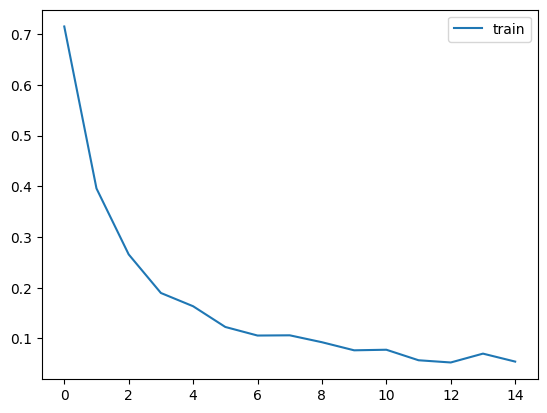

In [26]:
from matplotlib import pyplot as plt
print("Loss")
plt.plot(history.history['loss'], label ='train')
plt.legend()
plt.show()

Accuracy


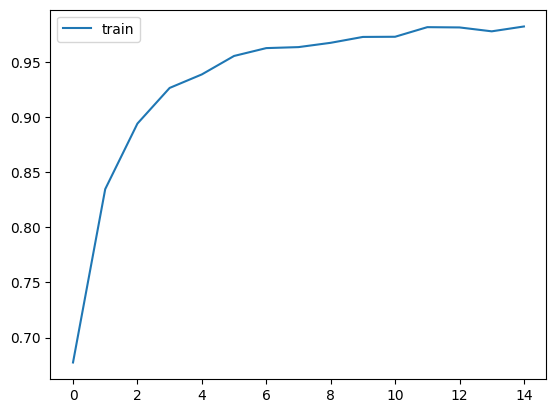

In [27]:
print("Accuracy")
plt.plot(history.history['accuracy'], label ='train')
plt.legend()
plt.show()

In [28]:
model.save('/content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/fs_trail_10_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [30]:
predict_model = load_model("/content/drive/MyDrive/shiftdel/ALZ/SAVED MODELS/TRIAL 10/BEST MODEL/best_model.h5")

## Best model report

In [31]:
from sklearn.metrics import classification_report

true_labels = test.classes

y_pred = predict_model.predict(test)
predicted_labels = np.argmax(y_pred, axis=1)


class_labels = list(test.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print(report)

253/253 [==============================] - 31s 121ms/step
                  precision    recall  f1-score   support

    MildDemented       0.98      0.98      0.98      2026
ModerateDemented       0.98      0.98      0.98      2069
     NonDemented       0.98      0.98      0.98      1974
VeryMildDemented       0.98      0.98      0.98      2007

        accuracy                           0.98      8076
       macro avg       0.98      0.98      0.98      8076
    weighted avg       0.98      0.98      0.98      8076



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels,predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

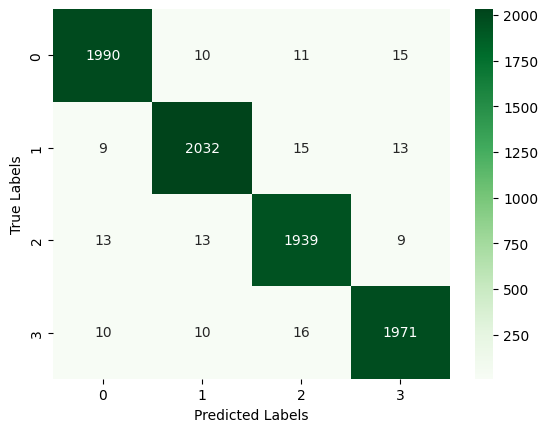

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [34]:
class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [35]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/MildDemented/002cb9c1-b160-4c76-b7e4-5fb2f1b527f7.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 1s 1s/step
Predicted Class: MildDemented


In [36]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/ModerateDemented/00a4080b-0cea-436f-9c97-031ee6d3b5f5.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 83ms/step
Predicted Class: ModerateDemented


In [37]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/NonDemented/00c69c46-4fce-42e2-94d6-f5f39c802c5a.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 22ms/step
Predicted Class: NonDemented


In [38]:
new_image_path = '/content/DATA/AlzheimerDatasetFull/VeryMildDemented/016144e2-7acd-49b0-aaa4-1f08a3af3ddd.jpg'
img = image.load_img(new_image_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
predictions = predict_model.predict(img_array)




predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 32ms/step
Predicted Class: VeryMildDemented
